In [192]:
# importing some libraries that I will use ibn this script
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.ticker as ticker
import pycountry
import re
from collections import Counter
# codes below adjust the number of rows and columns displayed by Pandas, remove the # sign if you would like Pandas to display data beyond the default configuration 
# pd.options.display.max_rows= 40000
# pd.options.display.max_columns= 6

# The line below defines the pathway to store plots which will be used throughout the script
fig_folder = "../plots//"

# changing the font used for plots
plt.rcParams['font.family'] = 'cambria'  



In [193]:
# The line below gets the CSV file which is stored in the "source" folder
csv="../source/trump_insult_tweets_2014_to_2021.csv"
# This line reads the CSV file called in the previous line
df_trump=pd.read_csv(csv)
# This line displays the content of the CSV file stored in the object " df_trump"
df_trump

# Uncomment the lines below if you want to see the length of the dataset or a random sample of the data
#len(df_trump)
#df_trump.sample(10)

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."
...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...


# <font color = "magenta">In the cell below, I am rearranging and adjusting the data frame (df_trump) </font>

In [194]:
#this line removes the column "Unnamed:0" from the df_trump and only keeps the index column
df_trump.drop(df_trump.columns[0], axis= 1, inplace= True)

# Since I want to attribute dates to day of the week I am using the to_datetime method in Pandas
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['day_of_week'] = df_trump['date'].dt.day_name()

# Next I am going to rearrange the columns in a way that date and day_of_week become adjacent
new_column_order = ['date', 'day_of_week', 'target', 'insult', 'tweet']
df_trump = df_trump[new_column_order]

# the date column in the df_trump was not a date.time format, so I am converting it to the proper format
df_trump['date'] = pd.to_datetime(df_trump['date'])


# I am filtering the data to the years Donald Trump was in office, Early 2017 to late 2020
df_trump = df_trump[(df_trump['date'] >= '2017-01-01') & (df_trump['date'] <= '2020-12-31')]

# <font color = "yellow"> Now that I have sorted the dataframe and filtered it out I try to extrapolate some patterns and plot them </font>

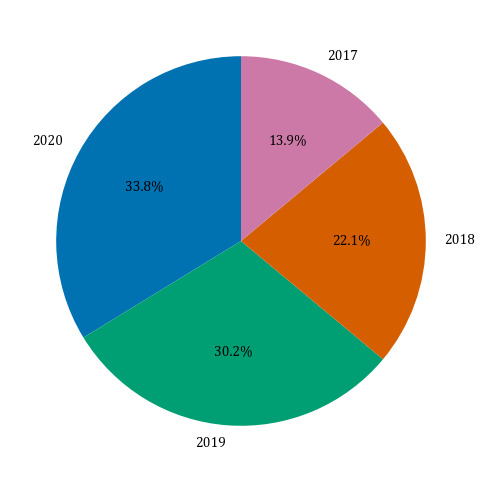

In [5]:
#Percentage of tweets per year across the four years in office
#  get the total number of tweets in each year and sort in ascending order

tweets_per_year = df_trump['date'].dt.year.value_counts().sort_index(ascending=False)

# I am using the colorblind-friendly palette from Seaborn
plt.figure(figsize=(8,6))
plt.pie(tweets_per_year, labels=tweets_per_year.index, autopct='%1.1f%%', startangle=90, colors= ['#0072B2', '#009E73', '#D55E00', '#CC79A7'])
plt.title("")
plt.savefig(fig_folder + "pieplot_tweets.png")

plt.show()


C:\Users\hta031\AppData\Local\Temp\ipykernel_37256\2244819121.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates = all_dates[~all_dates.isin(trump_dates)]


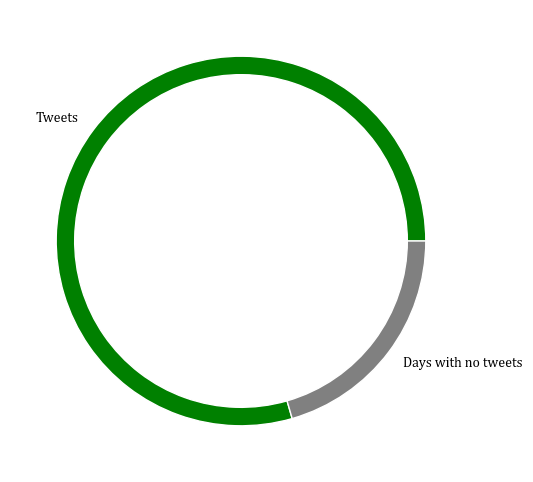

(1461, 1161, 300)

In [72]:
# find which dates trump did not send any tweet at all
all_dates = pd.date_range(start='2017-01-01', end='2020-12-31')
trump_dates = df_trump['date'].dt.date.unique()
missing_dates = all_dates[~all_dates.isin(trump_dates)]
missing_dates

# how many days did trump not send any tweet at all and how many days he sent at least one tweet and the total length of the data
len(all_dates),len(trump_dates), len(missing_dates)


# make a doughnut of the data in this cell
plt.figure(figsize=(8,6))
plt.pie([len(trump_dates), len(missing_dates)], labels=['Tweets', 'Days with no tweets'], startangle=360, colors=['green', 'grey'],wedgeprops=dict(width=0.1, edgecolor='w'))
plt.title('')
plt.show()


len(all_dates),len(trump_dates), len(missing_dates)

# of all 1461 days, 300 days he did not tweet at all and 1161 days he tweeted at least once


In [20]:
len(trump_dates)

1161

# <font color= "cyan"> In the cell below making an overlay of the pie plot and doughnut plots </font > 

C:\Users\hta031\AppData\Local\Temp\ipykernel_30408\3950691860.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  missing_dates = all_dates[~all_dates.isin(trump_dates)]


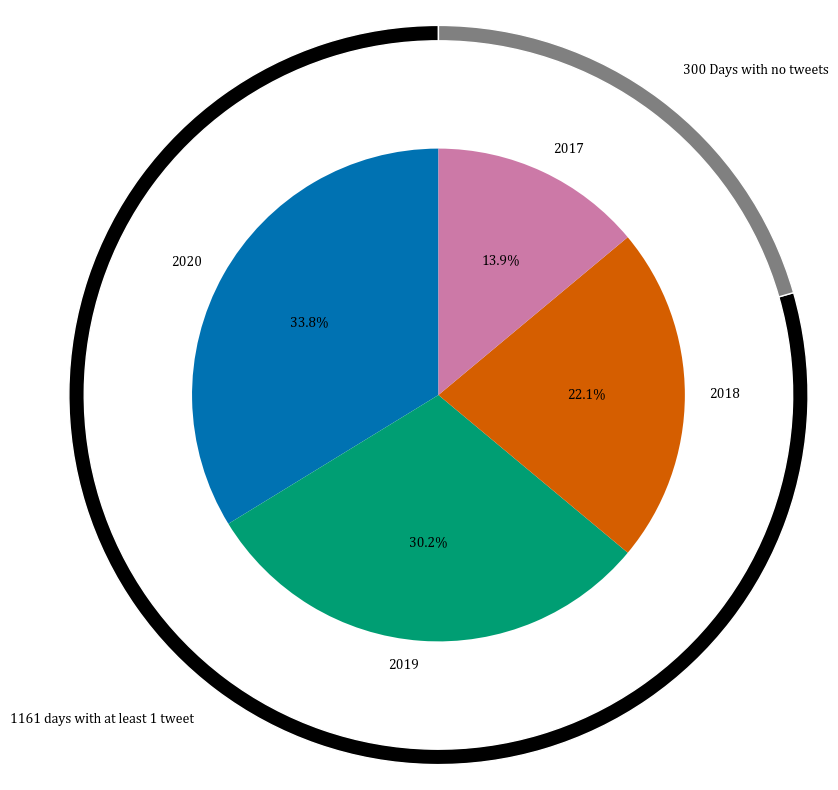

In [197]:
tweets_per_year = df_trump['date'].dt.year.value_counts().sort_index(ascending=False)
all_dates = pd.date_range(start='2017-01-01', end='2020-12-31')
trump_dates = df_trump['date'].dt.date.unique()
missing_dates = all_dates[~all_dates.isin(trump_dates)]
# Data for the doughnut plot
len(all_dates)
total_days = 1461  
len(missing_dates)
days_with_no_tweets = 300  
days_with_tweets = total_days - days_with_no_tweets  # Calculated days with at least one tweet

# Setting up the figure
plt.figure(figsize=(10, 10))

# Making the pie plot for the percentage of tweets per year, positioned centrally with a smaller radius
plt.pie(tweets_per_year, labels=tweets_per_year.index, autopct='%1.1f%%', startangle=90, radius=0.8,
        colors=['#0072B2', '#009E73', '#D55E00', '#CC79A7'])

# Adding the doughnut plot around the pie plot with a larger diameter but thinner width
plt.pie([days_with_tweets, days_with_no_tweets], radius=1.2, startangle=90,
        colors=['black', 'grey'], wedgeprops=dict(width=0.05, edgecolor='w'),labels=['1161 days with at least 1 tweet', '300 Days with no tweets'])

plt.savefig(fig_folder + "pie_doughnut.png")

plt.title('')
plt.show()



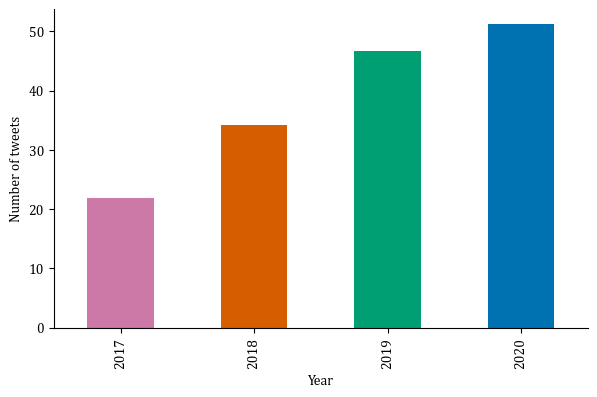

In [72]:

#Average number of tweets per week per year

# Get the average number of tweets per week per year
df_trump['week'] = df_trump['date'].dt.isocalendar().week
df_trump['year'] = df_trump['date'].dt.year
df_week = df_trump.groupby(['year', 'week']).size().reset_index(name='number_of_tweets')
df_week = df_week.groupby('year')['number_of_tweets'].mean().reset_index()

# Plotting

ax = df_week.plot(x='year', y='number_of_tweets', kind='bar',width = 0.5, color=['#CC79A7', '#D55E00','#009E73','#0072B2'  ],  figsize=(8, 6), legend=False)

plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.title('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.legend().remove()




plt.tight_layout(pad=8)

plt.savefig(fig_folder + "av_tweets_per_week.png")

<Figure size 800x600 with 0 Axes>

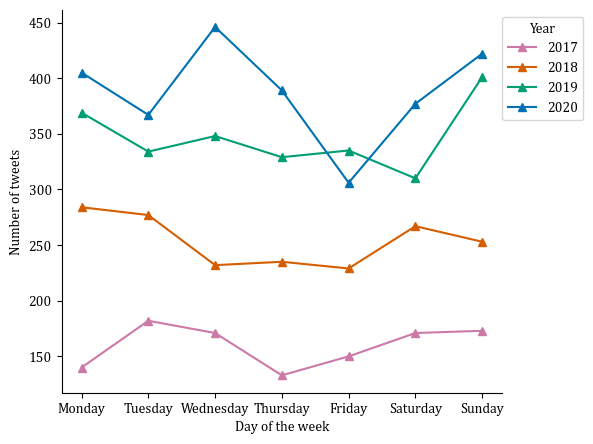

In [27]:
#Average number of tweets per day of the week per year


tweets_per_day_of_week = df_trump.groupby(['day_of_week', df_trump['date'].dt.year]).size().unstack()
tweets_per_day_of_week = tweets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(8,6))
ax = tweets_per_day_of_week.plot(kind='line', marker='^', color=['#CC79A7', '#D55E00','#009E73','#0072B2'])
plt.title('')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.legend( tweets_per_day_of_week.columns, title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(pad=2)
plt.savefig(fig_folder + "trend_per_day_per_year.png")

plt.show()



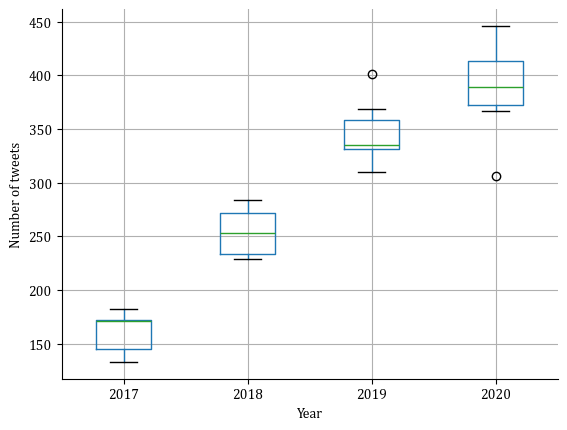

In [8]:
#Number of tweets per day of the week per year -  box plot
tweets_per_day_of_week = df_trump.groupby(['day_of_week', df_trump['date'].dt.year]).size().unstack()
tweets_per_day_of_week = tweets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax = tweets_per_day_of_week.boxplot()
plt.title('')
plt.xlabel('Year')
plt.ylabel('Number of tweets')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(fig_folder + "boxplot_tweets_per_year.png")

plt.show()


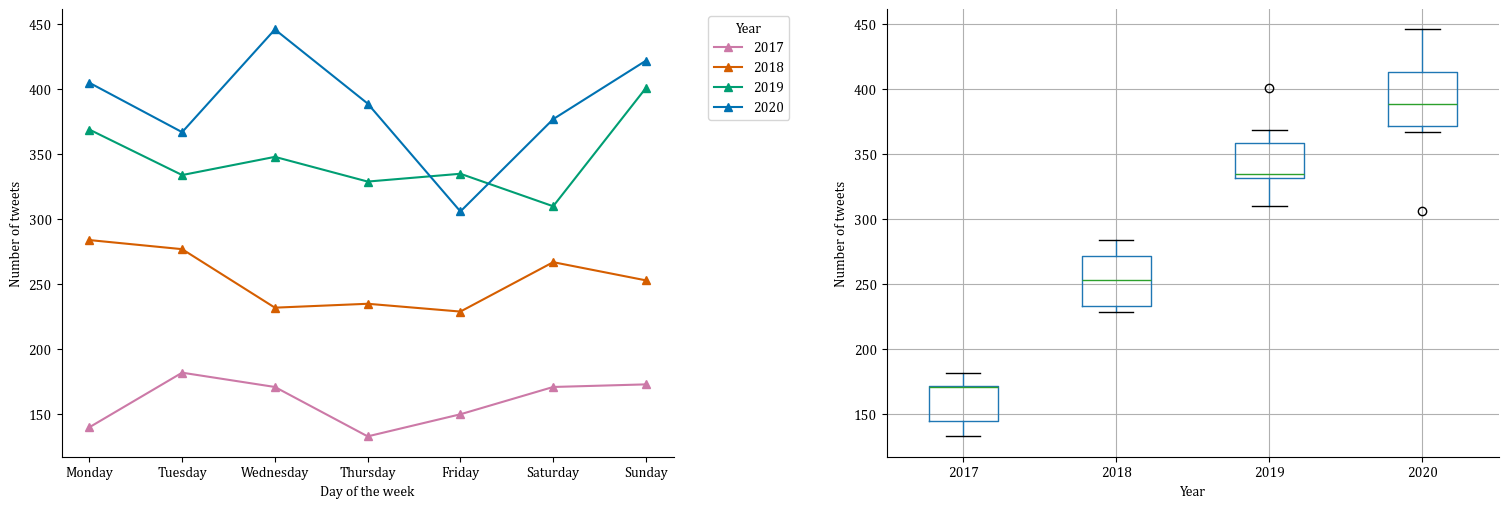

date
2017      Tuesday
2018       Monday
2019       Sunday
2020    Wednesday
dtype: object

In [26]:
tweets_per_day_of_week = df_trump.groupby(['day_of_week', df_trump['date'].dt.year]).size().unstack()
tweets_per_day_of_week = tweets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure and two subplots side by side

# Plot 1: Line plot
tweets_per_day_of_week.plot(kind='line', marker='^', color=['#CC79A7', '#D55E00', '#009E73', '#0072B2'], ax=ax[0])
ax[0].set_title('')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Number of tweets')
ax[0].legend(tweets_per_day_of_week.columns, title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Plot 2: Boxplot
tweets_per_day_of_week.boxplot(ax=ax[1])
ax[1].set_title('')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of tweets')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.tight_layout(pad=4)
#plt.savefig(fig_folder + "combined_plots.png")  

plt.show()

#get the number of tweets posted on each year in total
tweets_per_year = df_trump['date'].dt.year.value_counts().sort_index(ascending=False)
tweets_per_year
tweets_per_day_of_week.idxmax()


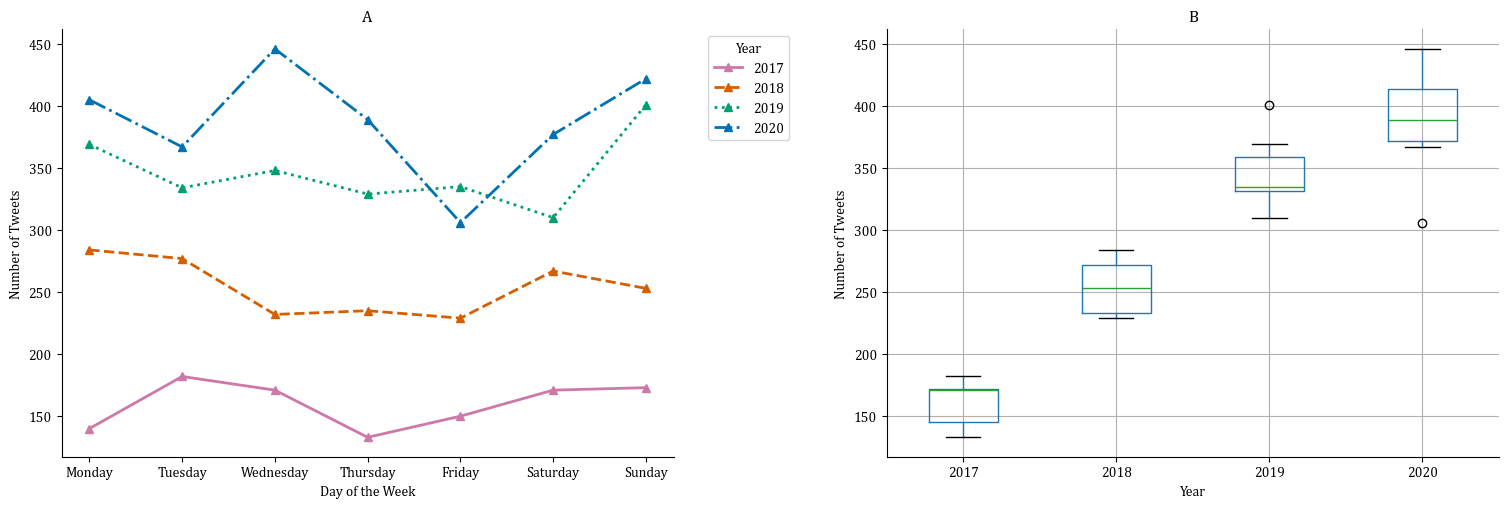

date
2017      Tuesday
2018       Monday
2019       Sunday
2020    Wednesday
dtype: object

In [31]:

# I realized that the previous plot is not color-blindness friendly, therefore in this cell, I am adding hatches/line_styles to make it easier to differentiate 
tweets_per_day_of_week = df_trump.groupby(['day_of_week', df_trump['date'].dt.year]).size().unstack()
tweets_per_day_of_week = tweets_per_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure and two subplots side by side



# Define line styles and colors for clarity and visibility
line_styles = ['-', '--', ':', '-.']
colors = ['#CC79A7', '#D55E00', '#009E73', '#0072B2']

# Ensure that each line is plotted individually with its style
for i, (column, line_style, color) in enumerate(zip(tweets_per_day_of_week.columns, line_styles, colors)):
    ax[0].plot(tweets_per_day_of_week.index, tweets_per_day_of_week[column], linestyle=line_style, marker='^', color=color, linewidth=2, label=column)
#Tweets per Day of the Week
ax[0].set_title('A')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Number of Tweets')
ax[0].legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Continue with the boxplot as before
tweets_per_day_of_week.boxplot(ax=ax[1])
#Tweets Distribution by Year
ax[1].set_title('B')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Tweets')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.tight_layout(pad=4)
plt.savefig(fig_folder + "combined_plots_line.png")  
plt.show()
#get the number of tweets posted on each year in total
tweets_per_year = df_trump['date'].dt.year.value_counts().sort_index(ascending=False)
tweets_per_year
tweets_per_day_of_week.idxmax()


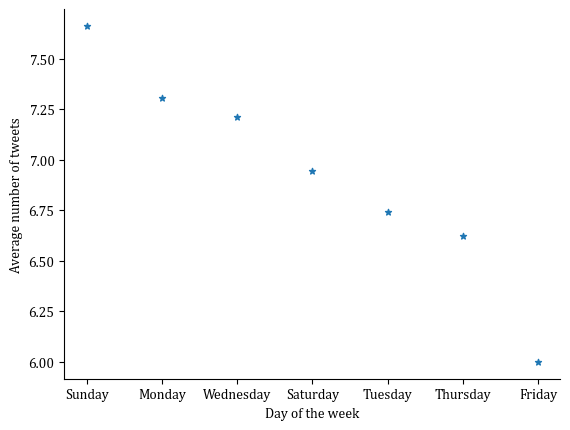

In [62]:
# average number of tweets per each individual day for each year
df_day_of_week_per_year = df_trump.groupby(['date', 'day_of_week']).size().reset_index()
df_day_of_week_per_year.columns = ['date', 'day_of_week', 'number_of_tweets']
df_day_of_week_per_year = df_day_of_week_per_year.groupby('day_of_week')['number_of_tweets'].mean().reset_index()
df_day_of_week_per_year = df_day_of_week_per_year.sort_values(by='number_of_tweets', ascending=False)
df_day_of_week_per_year


# make a barplot of df_day_of_week_per_year
ax = df_day_of_week_per_year.plot(kind="scatter", marker="*", x='day_of_week', y='number_of_tweets')
plt.xlabel('Day of the week')
plt.ylabel('Average number of tweets')
#Average number of tweets per day of the week
plt.title('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(fig_folder + "av_tweet_per_day_of_week.png") 
plt.show()

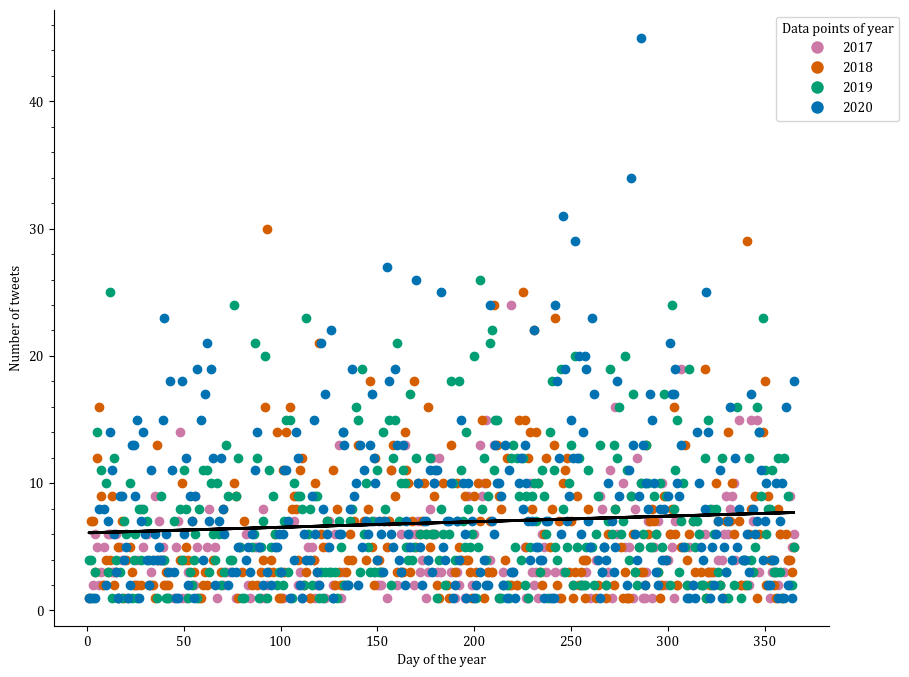

In [24]:

tweets_per_day = df_trump['date'].value_counts().sort_index()
# create a dataframe with the number of tweets per day
df_tweets_per_day = pd.DataFrame({'date': tweets_per_day.index, 'tweets': tweets_per_day.values})
# create a new column with the day of the year
df_tweets_per_day['day_of_year'] = df_tweets_per_day['date'].dt.dayofyear
# fit a linear regression model to the data
model = LinearRegression()
model.fit(df_tweets_per_day[['day_of_year']], df_tweets_per_day['tweets'])
# make predictions with the model
predictions = model.predict(df_tweets_per_day[['day_of_year']])
# allocate a color to data points of each year
colors = np.array(['#CC79A7', '#D55E00', '#009E73', '#0072B2'])  # Add more colors if needed
years = np.sort(df_tweets_per_day['date'].dt.year.unique())  # Sorted unique years

plt.figure(figsize=(10, 8))
for i, year in enumerate(years):
    yearly_data = df_tweets_per_day[df_tweets_per_day['date'].dt.year == year]
    plt.scatter(yearly_data['day_of_year'], yearly_data['tweets'], color=colors[i], label=str(year))

plt.plot(df_tweets_per_day['day_of_year'], predictions, color='black', linestyle='-', linewidth=2)

plt.xlabel('Day of the year')
plt.ylabel('Number of tweets')
plt.title('')

# Adjust y-axis ticks
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(ticker.AutoLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

#create custom legend made by chat GPT
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=str(year)) for i, year in enumerate(years)]
plt.legend(handles=legend_handles, title="Data points of year", bbox_to_anchor=(1.1, 1))

plt.savefig(fig_folder + "regres.png")  

plt.show()


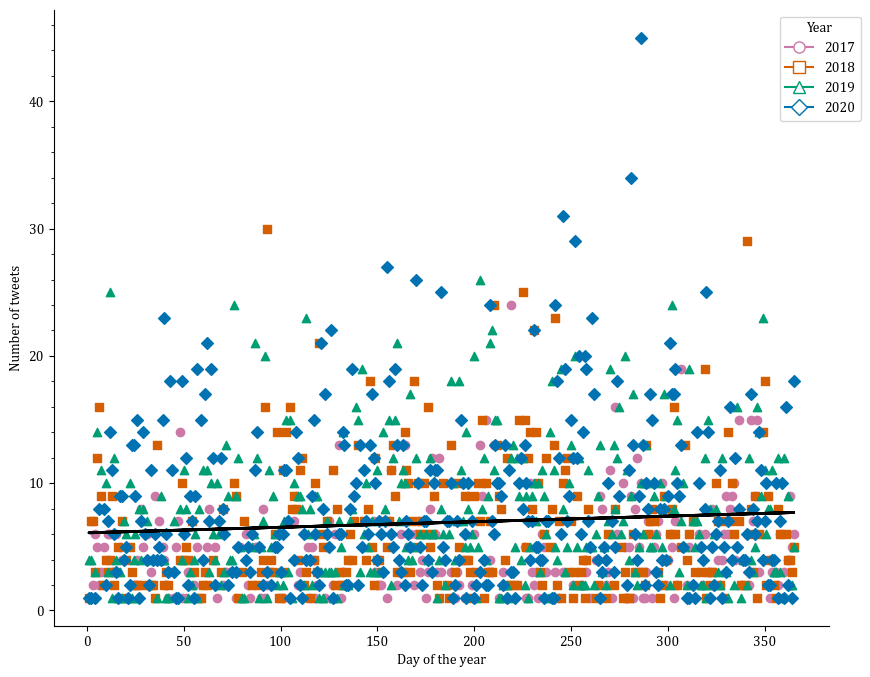

In [52]:
# the same plot with different marker styles, to make it colorblindness friendly
tweets_per_day = df_trump['date'].value_counts().sort_index()
# create a dataframe with the number of tweets per day
df_tweets_per_day = pd.DataFrame({'date': tweets_per_day.index, 'tweets': tweets_per_day.values})
# create a new column with the day of the year
df_tweets_per_day['day_of_year'] = df_tweets_per_day['date'].dt.dayofyear
# fit a linear regression model to the data
model = LinearRegression()
model.fit(df_tweets_per_day[['day_of_year']], df_tweets_per_day['tweets'])
# make predictions with the model
predictions = model.predict(df_tweets_per_day[['day_of_year']])
# allocate a color to data points of each year
colors = np.array(['#CC79A7', '#D55E00', '#009E73', '#0072B2'])  # Add more colors if needed
years = np.sort(df_tweets_per_day['date'].dt.year.unique())  # Sorted unique years
markers = ['o', 's', '^', 'D', '*', 'x']
plt.figure(figsize=(10, 8))
for i, year in enumerate(years):
    yearly_data = df_tweets_per_day[df_tweets_per_day['date'].dt.year == year]
    plt.scatter(yearly_data['day_of_year'], yearly_data['tweets'], color=colors[i], label=str(year), marker=markers[i])

plt.plot(df_tweets_per_day['day_of_year'], predictions, color='black', linestyle='-', linewidth=2)

plt.xlabel('Day of the year')
plt.ylabel('Number of tweets')
plt.title('')

# Adjust y-axis ticks
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(ticker.AutoLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

#create custom legend made by chat GPT
legend_handles = [Line2D([0], [0], marker=markers[i], color=colors[i], markerfacecolor='white', markersize=8, label=str(year)) for i, year in enumerate(years)]
plt.legend(handles=legend_handles, title="Year", bbox_to_anchor=(1.05, 1))

plt.savefig(fig_folder + "regres_markerstyle.png")  

plt.show()


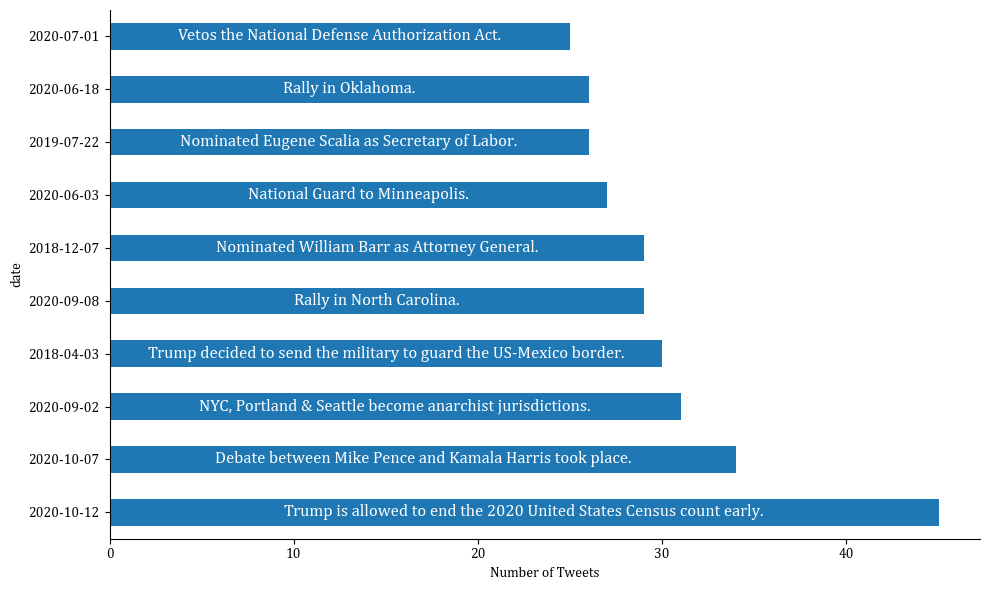

In [53]:
# the dates with the most tweets top 10
df_trump['date'] = pd.to_datetime(df_trump['date'])
df_trump['date'].value_counts().head(10)


# find what major event happened on the top 10 dates with the most tweets in this cell
# top 10 dates with the most tweets
top_10_dates = df_trump['date'].value_counts().head(10).reset_index()
top_10_dates.columns = ['date', 'number_of_tweets']
top_10_dates
# major events on the top 10 dates with the most tweets
major_events = [
           "Trump is allowed to end the 2020 United States Census count early.",
          "Debate between Mike Pence and Kamala Harris took place.",
          "NYC, Portland & Seattle become anarchist jurisdictions.",
          "Trump decided to send the military to guard the US-Mexico border.",
          "Rally in North Carolina.",
          "Nominated William Barr as Attorney General.",
          "National Guard to Minneapolis.",
          "Nominated Eugene Scalia as Secretary of Labor.",
          "Rally in Oklahoma.",
          "Vetos the National Defense Authorization Act."]

plt.figure(figsize=(10, 6))  # Adjusted for better visibility of bars and text
ax = df_trump['date'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Tweets')
plt.title('')

# Since we're plotting horizontally, adjust y-tick labels to match the top 10 dates
ax.set_yticklabels(top_10_dates['date'].dt.strftime('%Y-%m-%d'), rotation=0)

# Add event labels in the middle of the bars with increased font size
for i, (index, row) in enumerate(top_10_dates.iterrows()):
    # Calculate the midpoint of the bar's length
    midpoint = row['number_of_tweets'] / 2
    # Place the text in the middle of the bar with a larger font size
    ax.text(midpoint, i, f"{major_events[i]}", va='center', ha='center', fontsize=12, color="white")  # Increased font size

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#plt.savefig(fig_folder + "top10dates_events.png")  

plt.tight_layout()
plt.show()



In [19]:
# import plotly.express as px

# # Assuming top_10_dates and major_events are already defined

# # Add major events as a new column to your DataFrame
# top_10_dates['major_event'] = major_events

# # Create a bar plot with Plotly
# fig = px.bar(top_10_dates, x='date', y='number_of_tweets', 
#              hover_data=['major_event'], text='major_event')

# # Update layout for better readability
# fig.update_traces(textposition='outside')
# fig.update_layout(
#     xaxis_tickangle=-45,
#     xaxis_title="Date",
#     yaxis_title="Number of Tweets",
#     title="Top 10 Dates with the Most Tweets and Corresponding Major Events",
#     hovermode="closest"
# )

# # Show the figure
# fig.show()


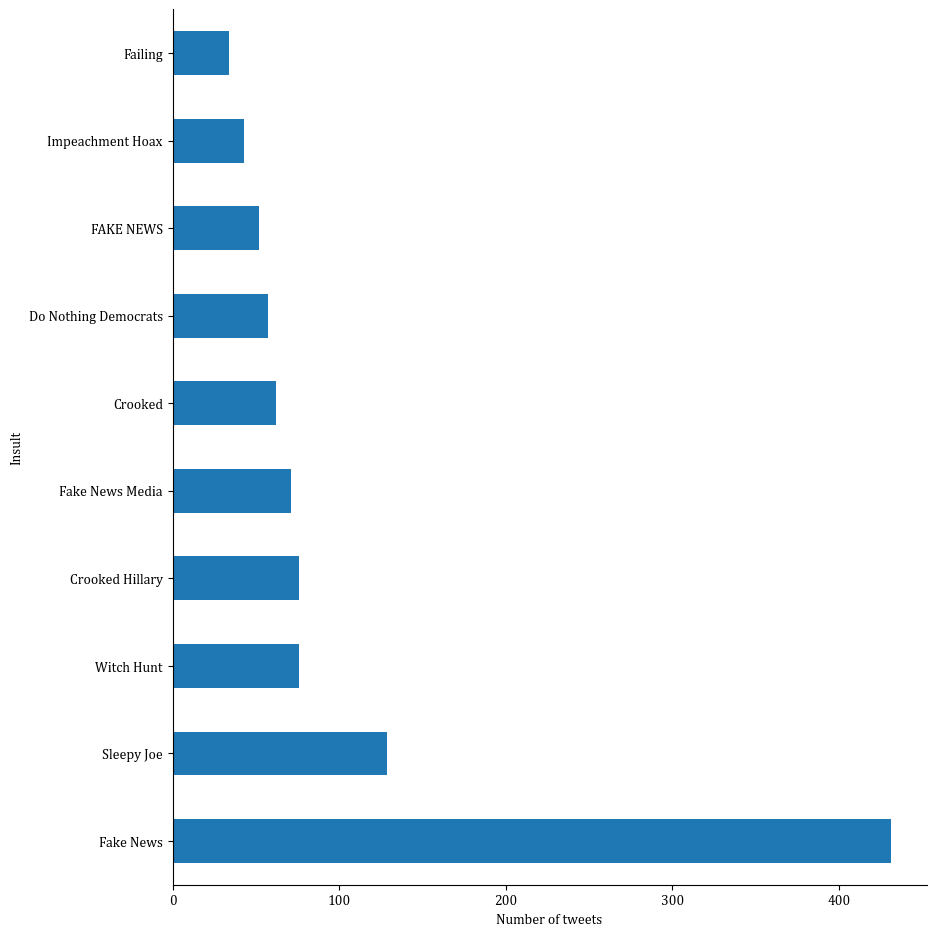

In [200]:
# in df_trump, get the number of each insult 
insults = df_trump['insult'].value_counts()
insults
plt.figure(figsize=(10,10))
ax = df_trump['insult'].value_counts().head(10).plot(kind="barh")

plt.xlabel('Number of tweets')
plt.ylabel('Insult')
plt.title('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout(pad=3.0)
plt.savefig(fig_folder + "top_10_insults.png") 
plt.show()

# the data shows an interesting psychological effect, "Fake news" comes in different forms, lower case, upper case and a combination
#this might also be attributed to some level anger 

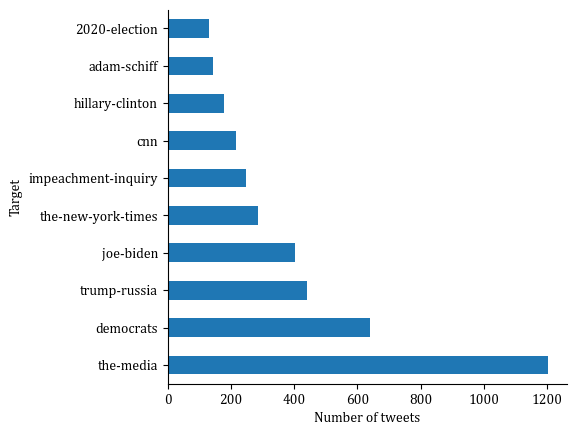

In [59]:
# in df_trump, get the number of each target
targets = df_trump['target'].value_counts()
targets

# make a barplot of top 10 targets

ax = df_trump["target"].value_counts().head(10).plot(kind= "barh")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(pad=3.0)
plt.xlabel('Number of tweets')
plt.ylabel('Target')
plt.title('')
plt.savefig(fig_folder + "top_10_targets.png") 
plt.show()


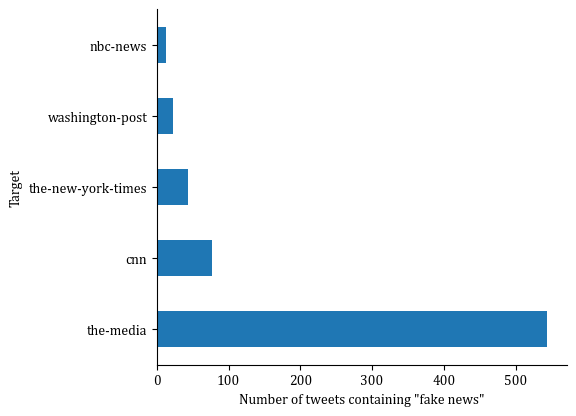

In [77]:
# find how many times insults containing the terms but not exactly "fake news" and their corresponding targets
fake_news = df_trump[df_trump['insult'].str.contains('fake news', case=False)]
fake_news['target'].value_counts().head(5)
# make a plot showing the number of tweets with "fake news" and their corresponding targets
ax = fake_news['target'].value_counts().head(5).plot(kind='barh')
plt.xlabel('Number of tweets containing "fake news"')
plt.ylabel('Target')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout(pad=3.0)
plt.savefig(fig_folder + "which_media.png") 
plt.title('')
plt.show()

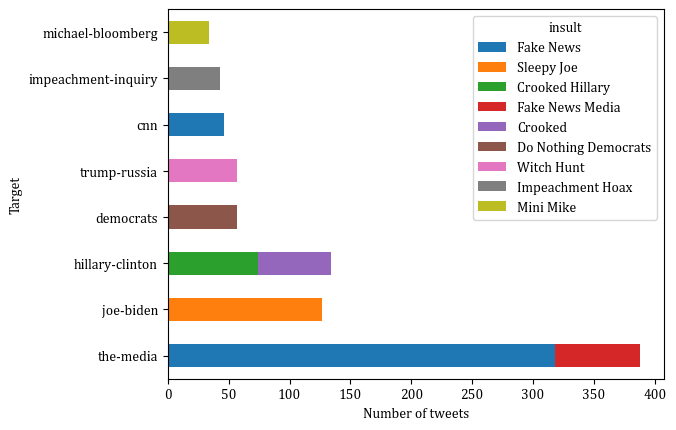

In [73]:

# find another way to show the correlation between target and insult
df_trump.groupby(['target', 'insult']).size().sort_values(ascending=False).head(10).unstack().plot(kind='barh', stacked=True)
plt.xlabel('Number of tweets')
plt.ylabel('Target')
plt.title('')
plt.show()



In [99]:
import pandas as pd
import pycountry
import re
from collections import Counter

# Generate a basic list of country names from pycountry
country_names = {country.name.lower(): country.name for country in pycountry.countries}

# Update the list with common names and abbreviations for specific countries
country_aliases = {
    **country_names,
    'iran': 'Iran',
    'us': 'United States',
    'usa': 'United States',
    'united states': 'United States',
    'uk': 'United Kingdom',
    'united kingdom': 'United Kingdom',
    'russia': 'Russia',
    # Add other common names or abbreviations for Russia if necessary
}

# Initialize a counter for the country mentions
country_mentions = Counter()

# Function to preprocess text and search for country mentions
def preprocess_and_search(text, aliases):
    # Normalize the text to lowercase and replace separators
    text = re.sub(r'[-_]', ' ', text.lower())
    for alias, official_name in aliases.items():
        if re.search(r'\b' + re.escape(alias) + r'\b', text):
            country_mentions[official_name] += 1

# Iterate over each row in the DataFrame
for _, row in df_trump.iterrows():
    # Concatenate text from relevant columns, handling NaN values
    combined_text = ' '.join(str(row[col]) for col in ['tweet', 'insult', 'target'] if pd.notnull(row[col]))
    preprocess_and_search(combined_text, country_aliases)

# Convert the counter to a DataFrame for easier analysis and visualization
df_country_mentions = pd.DataFrame(country_mentions.items(), columns=['Country', 'Mentions']).sort_values(by='Mentions', ascending=False)

print(df_country_mentions)


           Country  Mentions
1           Russia       690
4    United States       660
7            China       262
0           Mexico        91
9          Georgia        82
3          Ukraine        81
6             Iran        77
10     Puerto Rico        35
2          Germany        34
14          Israel        29
17        Honduras        26
13          Canada        24
16     El Salvador        23
22       Guatemala        22
11  United Kingdom        17
24          France        16
20           Japan        11
32          Brazil        10
15        Pakistan         8
25            Iraq         7
19       Argentina         6
18       Singapore         5
23          Jersey         5
12     Afghanistan         4
8           Sweden         4
33        Colombia         4
26     New Zealand         3
28          Jordan         3
30           Egypt         3
31     Philippines         3
21    Saudi Arabia         2
5        Australia         2
27            Cuba         1
29         Som

C:\Users\hta031\AppData\Local\Temp\ipykernel_30408\3444753613.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


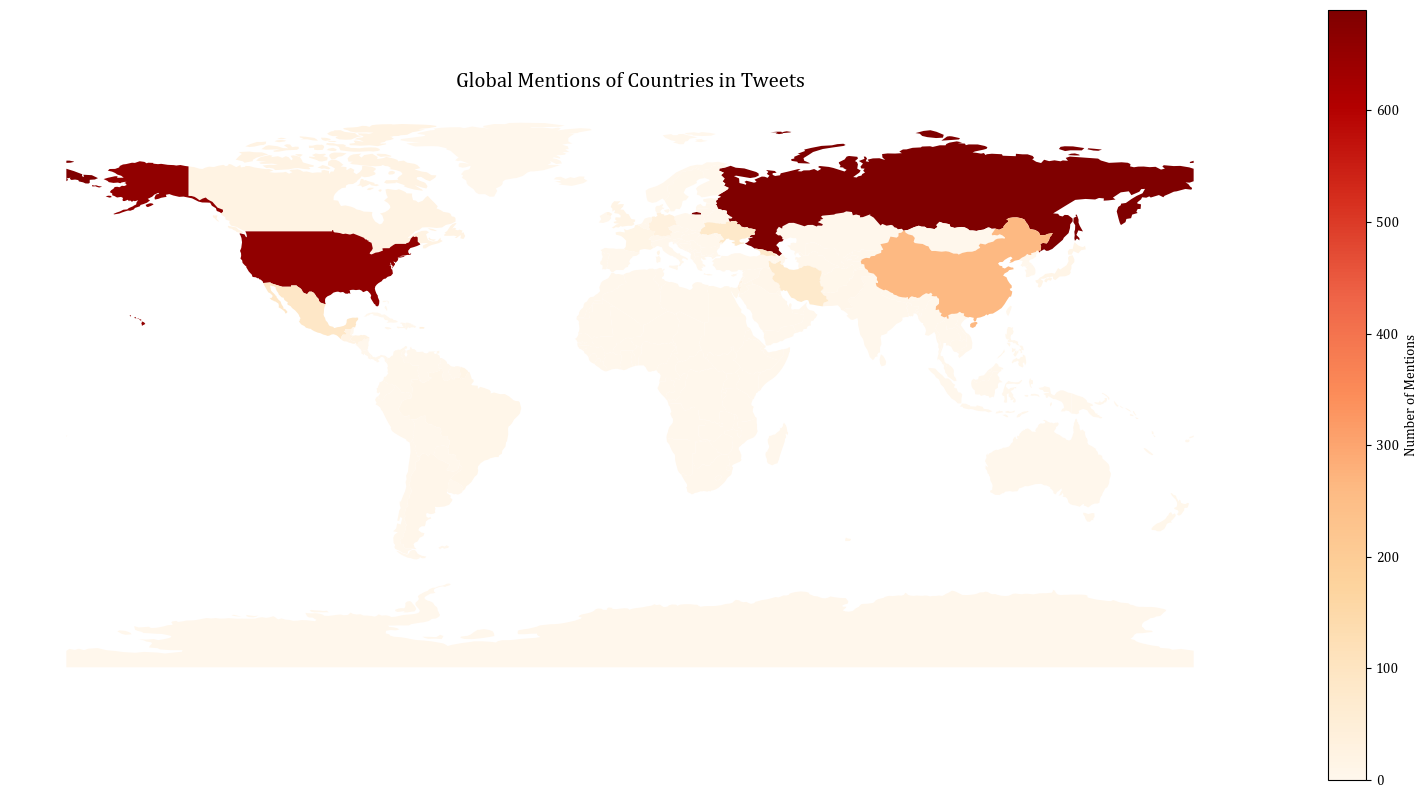

In [102]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoPandas world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Manual adjustment to the country names in your data to match the GeoPandas world dataframe
country_name_adjustments = {
    'United States': 'United States of America',
    'Russia': 'Russia',  # If Russia is written differently in GeoPandas, adjust it here.
    'UK': 'United Kingdom',
    # Add other adjustments as needed.
    # 'Puerto Rico' might not be listed as a separate country in the GeoPandas dataset.
    # You may have to decide how to handle territories like Puerto Rico.
}

# Apply the adjustments to the 'Country' column in your DataFrame
df_country_mentions['Country'] = df_country_mentions['Country'].replace(country_name_adjustments)

# Merge the adjusted DataFrame with the world GeoDataFrame
world_with_mentions = world.merge(df_country_mentions, how='left', left_on='name', right_on='Country')

# Replace NaN values in 'Mentions' column with 0
world_with_mentions['Mentions'] = world_with_mentions['Mentions'].fillna(0)

# Plot
fig, ax = plt.subplots(1, figsize=(20, 10))
world_with_mentions.plot(column='Mentions', ax=ax, legend=True, 
                  legend_kwds={'label': "Number of Mentions", 'orientation': "vertical"},
                  cmap='OrRd', 
                  missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "No mentions"})

plt.title('Global Mentions of Countries in Tweets', fontsize=15)
ax.set_axis_off()
plt.show()


C:\Users\hta031\AppData\Local\Temp\ipykernel_30408\1102727057.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


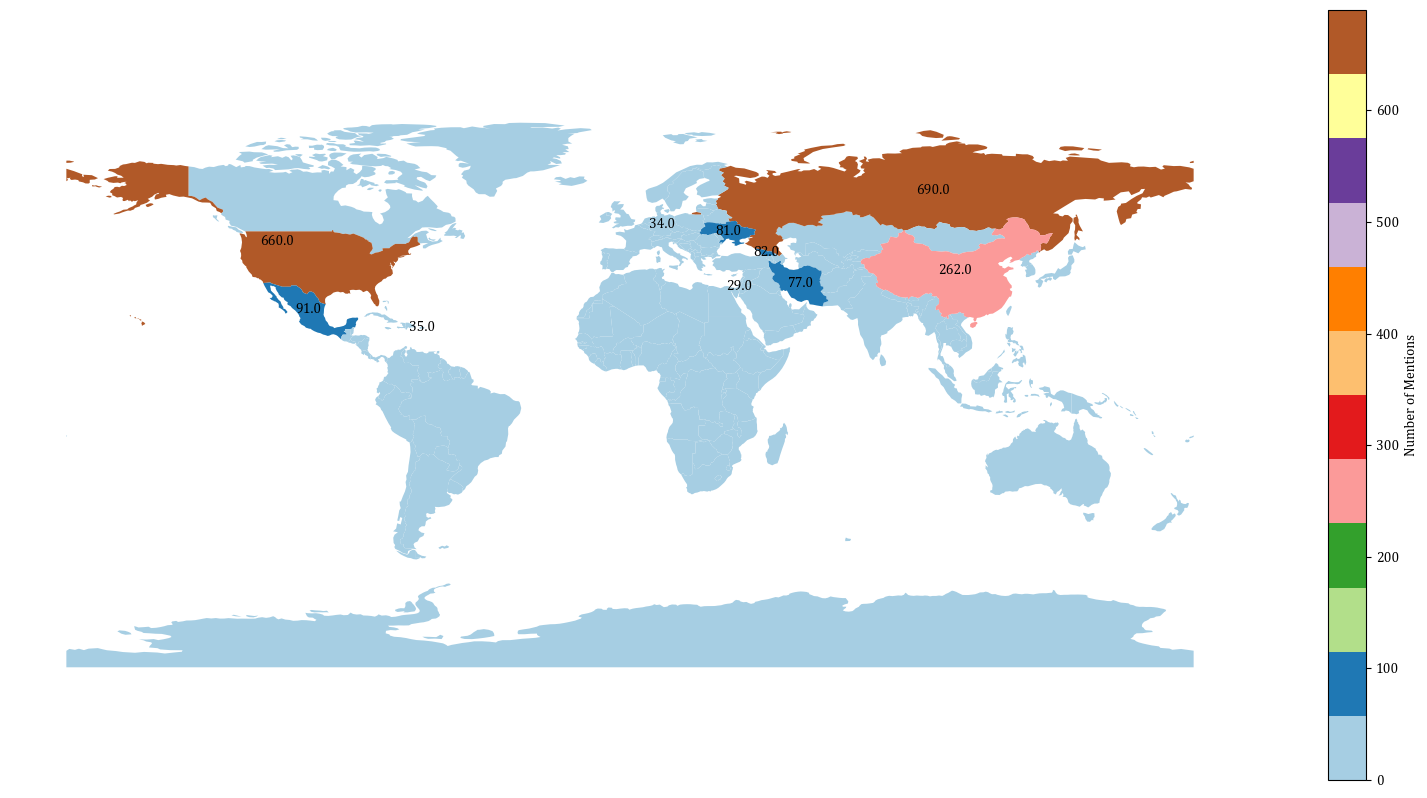

In [181]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoPandas world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the mapping adjustments here if necessary
country_name_adjustments = {
    'United States': 'United States of America',
    'UK': 'United Kingdom',
    # Add other necessary name adjustments
}

# Apply the adjustments to the 'Country' column in your DataFrame
df_country_mentions['Country'] = df_country_mentions['Country'].replace(country_name_adjustments)

# Merge the GeoDataFrame with the mentions DataFrame
world = world.merge(df_country_mentions, how='left', left_on='name', right_on='Country')

# Fill NaN values in the 'Mentions' column with 0
world['Mentions'] = world['Mentions'].fillna(0)

# Get the top 10 countries by mentions
top_countries = world.nlargest(10, 'Mentions')

# Plot the map

colormap = 'viridis'
colormap = "plasma"
colormap = "Pastel1"


colormap = "Paired"

colormap = "Set3"
colormap = "Pastel1"
colormap = 'PiYG'
colormap = 'Set3'
colormap = "Accent"
colormap = "Paired"
fig, ax = plt.subplots(1, figsize=(20, 10))
world.plot(column='Mentions', ax=ax, legend=True,
           legend_kwds={'label': "Number of Mentions", 'orientation': "vertical"},
           cmap=colormap,
           missing_kwds={"color": "lightgrey", "edgecolor": "black", "hatch": "///", "label": "No mentions"})

# Annotate the top 10 countries with their mention counts
for idx, row in top_countries.iterrows():
    # Some countries may be too small to display properly, adjust the positioning as needed
    plt.annotate(text=row['Mentions'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=10, color='black')

plt.title('', fontsize=15)
ax.set_axis_off()
plt.savefig(fig_folder + "map_pair.png")
plt.show()


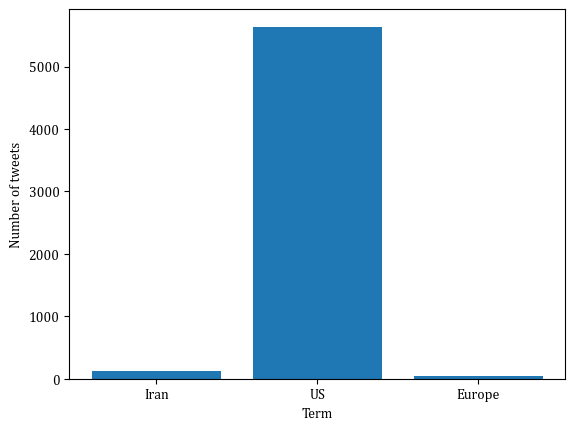

5639

In [191]:
# number of the term "iran" in df_trump "tweet", "target" and "insult" columns and sum up the results
iran = df_trump['tweet'].str.contains('iran', case=False).sum() + df_trump['target'].str.contains('iran', case=False).sum() + df_trump['insult'].str.contains('iran', case=False).sum()
iran

# number of the term "US" in df_trump "tweet", "target" and "insult" columns and sum up the results
US = df_trump['tweet'].str.contains('US', case=False).sum() + df_trump['target'].str.contains('US', case=False).sum() + df_trump['insult'].str.contains('US', case=False).sum()
US

# number of the term "Europe" in df_trump "tweet", "target" and "insult" columns and sum up the results
europe = df_trump['tweet'].str.contains('europe', case=False).sum() + df_trump['target'].str.contains('Putin', case=False).sum() + df_trump['insult'].str.contains('europe', case=False).sum()
europe

# make a bar plot of iran, US and europe
plt.bar(['Iran', 'US', 'Europe'], [iran, US, europe])
plt.xlabel('Term')
plt.ylabel('Number of tweets')
plt.title('')
plt.show()


US
